**INSTALLING TECHNICAL ANALYSIS LIBRARY**

In [39]:
!pip install ta

**IMPORTING NECESSARY LIBRARIES**

In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from datetime import date

**DOWNLOADIG DATA FROM YFINANCE**

In [41]:
#I have chosen ITC for the technical analysis
df=yf.download('ITC.NS',start='2016-01-01',end='2023-7-25')

[*********************100%%**********************]  1 of 1 completed


In [42]:
d0 = date(2016,1,1)
d1 = date(2023,10,25)
delta = d1 - d0
years=delta.days/365

In [43]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,218.399994,219.333328,217.100006,218.333328,173.945053,1479457
2016-01-04,217.000000,217.399994,214.366669,216.733337,172.670380,5906445
2016-01-05,216.733337,217.600006,216.033340,216.566666,172.537582,5816482
2016-01-06,218.000000,218.000000,209.699997,210.066666,167.359039,15234480
2016-01-07,209.199997,209.199997,205.766663,206.399994,164.437820,11809210
...,...,...,...,...,...,...
2023-07-18,472.549988,474.200012,471.000000,472.500000,472.500000,5352283
2023-07-19,472.750000,480.450012,468.100006,478.850006,478.850006,13867323
2023-07-20,479.899994,493.700012,476.299988,492.149994,492.149994,20250206


**CALCULATING OUR INDICATORS**

In [44]:
df['SMA_20']=df.Close.rolling(20).mean() #Simple Moving Avg for 20 days
df['vol'] = df.Close.rolling(20).std() #Volatility
df['upper'] = df.SMA_20 + (2*df.vol) #Upper Bollinger Band
df['lower'] = df.SMA_20 - (2*df.vol) #Lower Bollinger Band

In [45]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_20,vol,upper,lower
Date,,,,,,,,,,
2016-01-01,218.399994,219.333328,217.100006,218.333328,173.945053,1479457,NaN,NaN,NaN,NaN
2016-01-04,217.000000,217.399994,214.366669,216.733337,172.670380,5906445,NaN,NaN,NaN,NaN
2016-01-05,216.733337,217.600006,216.033340,216.566666,172.537582,5816482,NaN,NaN,NaN,NaN
2016-01-06,218.000000,218.000000,209.699997,210.066666,167.359039,15234480,NaN,NaN,NaN,NaN
2016-01-07,209.199997,209.199997,205.766663,206.399994,164.437820,11809210,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-18,472.549988,474.200012,471.000000,472.500000,472.500000,5352283,461.392500,12.149248,485.690997,437.094003
2023-07-19,472.750000,480.450012,468.100006,478.850006,478.850006,13867323,462.692500,12.570791,487.834082,437.550919
2023-07-20,479.899994,493.700012,476.299988,492.149994,492.149994,20250206,464.947501,13.618536,492.184573,437.710428


**CALCULATING DAILY RETURNS**

In [46]:
df['daily_returns']=df['Adj Close'].pct_change(1)

**SHARPE RATIO**

In [47]:
risk_free_rate=0.01/252 #ASssuming risk free rate of 1% for whole year(252 trading days)

In [48]:
df['excess_returns']=df['daily_returns']-risk_free_rate

In [49]:
sharpe_ratio=np.sqrt(252)*df['excess_returns'].mean()/df['excess_returns'].std()
sharpe_ratio

0.6114478190028252

**CALCULATING BENCHMARK RETURNS**

In [50]:
benchmark_return=(1+df.daily_returns).prod()-1
print("{:.4%}".format(benchmark_return))

170.9764%


**VISUALISING OUR CLOSE PRICES AND BOLLINGER BANDS**

<Axes: xlabel='Date'>

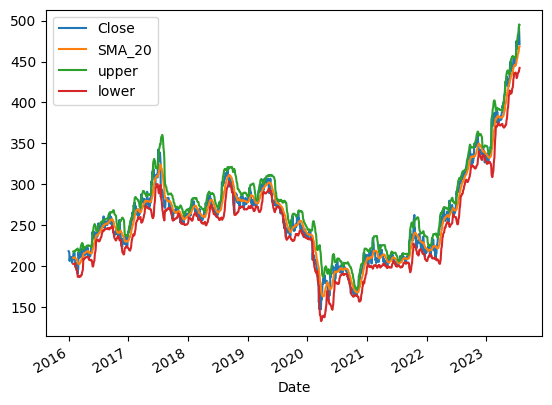

In [51]:
df[['Close','SMA_20','upper','lower']].plot()

In [52]:
df['rsi'] = ta.momentum.rsi(df.Close,window=6) #Relative Strength Index

<Axes: xlabel='Date'>

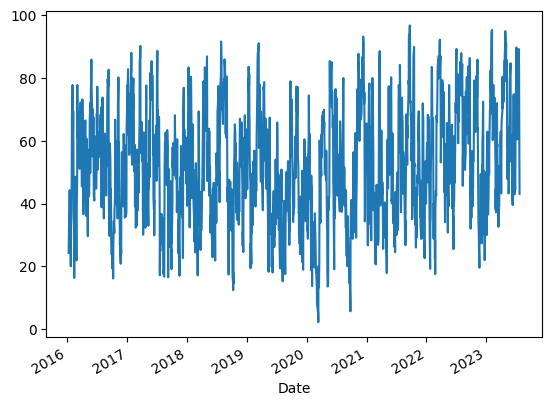

In [53]:
df['rsi'].plot()

**DEFINING BUYING AND SELLING CONDITONS**

In [54]:
conditions = [(df.rsi < 30) & (df.Close < df.lower),(df.rsi>70) & (df.Close>df.upper)]

In [55]:
choices = ['Buy','Sell']

In [56]:
df['signal']=np.select(conditions,choices)

In [57]:
df.dropna(inplace=True)

In [58]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_20,vol,upper,lower,daily_returns,excess_returns,rsi,signal
Date,,,,,,,,,,,,,,
2016-01-29,215.233337,217.333328,211.233337,213.466660,170.067841,12496231,210.284998,3.797422,217.879842,202.690154,0.005180,0.005140,70.361322,0
2016-02-01,212.433334,216.666672,209.899994,216.500000,172.484451,7351552,210.193332,3.610441,217.414215,202.972449,0.014210,0.014170,77.781714,0
2016-02-02,215.933334,217.266663,214.300003,216.166672,172.218903,7066827,210.164999,3.558263,217.281525,203.048472,-0.001540,-0.001579,75.295884,0
2016-02-03,214.500000,216.166672,213.066666,214.633331,170.997299,4921792,210.068332,3.397842,216.864016,203.272648,-0.007093,-0.007133,64.004389,0
2016-02-04,214.933334,216.399994,214.000000,214.533340,170.917618,3186769,210.291666,3.541484,217.374633,203.208698,-0.000466,-0.000506,63.262010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,472.549988,474.200012,471.000000,472.500000,472.500000,5352283,461.392500,12.149248,485.690997,437.094003,0.000318,0.000278,66.926509,0
2023-07-19,472.750000,480.450012,468.100006,478.850006,478.850006,13867323,462.692500,12.570791,487.834082,437.550919,0.013439,0.013399,79.188940,0
2023-07-20,479.899994,493.700012,476.299988,492.149994,492.149994,20250206,464.947501,13.618536,492.184573,437.710428,0.027775,0.027735,89.227499,0


In [59]:
df.signal=df.signal.shift() # I have shifted the signal by one index because we are buying on the next day after getting buy signal

In [60]:
position = False
buydates,selldates = [],[]
buyprice,sellprice = [],[]
df['shiftedclose']=df.Close.shift()


**FINDING EXECUTED TRADES**

In [61]:
for index, row in df.iterrows():

  if not position and row['signal'] == 'Buy':
    buydates.append(index)
    buyprice.append(row.Open)
    position = True
  if position:
     if row['signal'] == 'Sell' or row.shiftedclose < 0.95*buyprice[-1]:
      selldates.append(index)
      sellprice.append(row.Open)
      position = False


In [62]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_20,vol,upper,lower,daily_returns,excess_returns,rsi,signal,shiftedclose
Date,,,,,,,,,,,,,,,
2016-01-29,215.233337,217.333328,211.233337,213.466660,170.067841,12496231,210.284998,3.797422,217.879842,202.690154,0.005180,0.005140,70.361322,None,NaN
2016-02-01,212.433334,216.666672,209.899994,216.500000,172.484451,7351552,210.193332,3.610441,217.414215,202.972449,0.014210,0.014170,77.781714,0,213.466660
2016-02-02,215.933334,217.266663,214.300003,216.166672,172.218903,7066827,210.164999,3.558263,217.281525,203.048472,-0.001540,-0.001579,75.295884,0,216.500000
2016-02-03,214.500000,216.166672,213.066666,214.633331,170.997299,4921792,210.068332,3.397842,216.864016,203.272648,-0.007093,-0.007133,64.004389,0,216.166672
2016-02-04,214.933334,216.399994,214.000000,214.533340,170.917618,3186769,210.291666,3.541484,217.374633,203.208698,-0.000466,-0.000506,63.262010,0,214.633331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,472.549988,474.200012,471.000000,472.500000,472.500000,5352283,461.392500,12.149248,485.690997,437.094003,0.000318,0.000278,66.926509,0,472.350006
2023-07-19,472.750000,480.450012,468.100006,478.850006,478.850006,13867323,462.692500,12.570791,487.834082,437.550919,0.013439,0.013399,79.188940,0,472.500000
2023-07-20,479.899994,493.700012,476.299988,492.149994,492.149994,20250206,464.947501,13.618536,492.184573,437.710428,0.027775,0.027735,89.227499,0,478.850006


**VISUALIZATION OF EXECUTED TRADES**

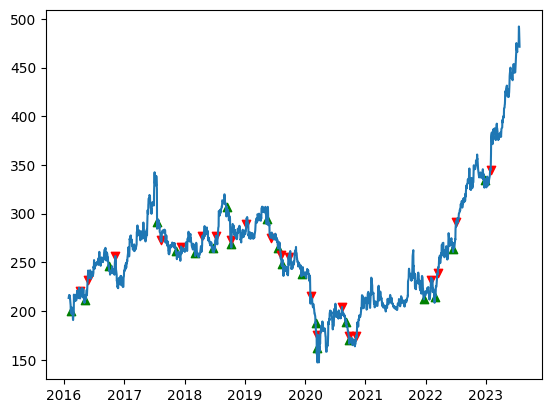

In [63]:
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close,marker='^',c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close,marker='v',c='r')

In [64]:
trades=pd.DataFrame(buydates)
trades['BuyDates']=buydates
trades['SellDates']=selldates
trades['BuyPrices']=buyprice
trades['SellPrices']=sellprice

**Returns For Each Trade**

In [65]:
trades['returns']=([(sell-buy)/buy for sell,buy in zip(sellprice,buyprice)])
trades['%returns']=(["{:.4%}".format((sell-buy)/buy) for sell,buy in zip(sellprice,buyprice)])


**NEW DATAFRAME FOR EXECUTED TRADES**

In [66]:
trades

,0,BuyDates,SellDates,BuyPrices,SellPrices,returns,%returns
0,2016-02-12,2016-02-12,2016-04-04,199.466660,218.000000,0.092914,9.2914%
1,2016-05-05,2016-05-05,2016-05-24,208.000000,232.000000,0.115385,11.5385%
2,2016-09-27,2016-09-27,2016-11-07,248.649994,253.800003,0.020712,2.0712%
3,2017-07-19,2017-07-19,2017-08-10,287.799988,272.649994,-0.052641,-5.2641%
4,2017-11-10,2017-11-10,2017-12-11,260.549988,264.649994,0.015736,1.5736%
5,2018-03-07,2018-03-07,2018-04-19,256.500000,277.250000,0.080897,8.0897%
6,2018-06-22,2018-06-22,2018-07-10,260.549988,275.500000,0.057379,5.7379%
7,2018-09-12,2018-09-12,2018-10-08,297.750000,279.000000,-0.062972,-6.2972%
8,2018-10-09,2018-10-09,2019-01-10,275.500000,290.750000,0.055354,5.5354%
9,2019-05-14,2019-05-14,2019-06-07,291.000000,276.799988,-0.048797,-4.8797%


**OTHER CALCULATIONS**

In [67]:
wins=0
losses=0
ex_trades=0
for i in trades['returns']:
  ex_trades=ex_trades+1
  if i>0:
    wins=wins+1
  if i<0:
    losses=losses+1

max_loss=trades.returns.min()
worst_trade=trades[trades.returns==max_loss]
max_profit=trades.returns.max()
best_trade=trades[trades.returns==max_profit]
bad_trades=trades[trades.returns<0]

**LOSS MAKING TRADES**

In [68]:
bad_trades

,0,BuyDates,SellDates,BuyPrices,SellPrices,returns,%returns
3,2017-07-19,2017-07-19,2017-08-10,287.799988,272.649994,-0.052641,-5.2641%
7,2018-09-12,2018-09-12,2018-10-08,297.750000,279.000000,-0.062972,-6.2972%
9,2019-05-14,2019-05-14,2019-06-07,291.000000,276.799988,-0.048797,-4.8797%
10,2019-07-22,2019-07-22,2019-08-08,268.000000,255.000000,-0.048507,-4.8507%
12,2019-12-11,2019-12-11,2020-02-04,235.600006,210.800003,-0.105263,-10.5263%
13,2020-03-05,2020-03-05,2020-03-11,187.550003,174.000000,-0.072247,-7.2247%
15,2020-09-07,2020-09-07,2020-09-22,187.250000,175.750000,-0.061415,-6.1415%


**LARGEST PROFIT MAKING TRADE**

In [69]:
best_trade

,0,BuyDates,SellDates,BuyPrices,SellPrices,returns,%returns
14,2020-03-13,2020-03-13,2020-08-12,150.0,202.5,0.35,35.0000%


**LARGEST LOSS MAKING TRADE**

In [70]:
worst_trade

,0,BuyDates,SellDates,BuyPrices,SellPrices,returns,%returns
12,2019-12-11,2019-12-11,2020-02-04,235.600006,210.800003,-0.105263,-10.5263%


**WIN RATIO**

In [71]:
winratio=wins/(wins+losses)
print("{:.2%}".format(winratio))

66.67%


**CUMMULATIVE RETURNS**

In [72]:
cumm_return=(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprice,buyprice)])+1).prod()-1
print("{:.4%}".format(cumm_return))

96.0695%


**MAXIMUM DRAWDOWN**

In [73]:
def max_drawdown(returns):
  cumulative_returns=(1+returns).cumprod()
  peak=cumulative_returns.expanding(min_periods=1).max()
  drawdown=(cumulative_returns/peak)-1
  return drawdown.min()

In [74]:
maximum_drawdown = max_drawdown(trades['returns'])
print("{:.4%}".format(maximum_drawdown))

-23.0812%


**ANNUAL RETURNS**

In [75]:
ann_return=pow((1+cumm_return),1/years)-1
print("{:.4%}".format(ann_return))

8.9925%
